In [1]:
import pandas as pd
data = pd.read_csv("dataAudio.csv")
print(data)

              filename  chroma_frequency  sp_centroid  spectral_bandwidth  \
0         boombap1.wav          0.453958  1958.596101         2242.096760   
1        boombap10.wav          0.464496  2986.492353         2837.508148   
2       boombap100.wav          0.459968  2377.117125         2708.232787   
3      boombap1000.wav          0.493061  2218.901984         2303.409329   
4      boombap1001.wav          0.502233  2215.360115         2261.072044   
...                ...               ...          ...                 ...   
12193      trap995.wav          0.479732  2341.972464         2381.461711   
12194      trap996.wav          0.586347  2309.798019         2479.139534   
12195      trap997.wav          0.572542  2055.582032         2287.343790   
12196      trap998.wav          0.531964  2348.962830         2425.149789   
12197      trap999.wav          0.485520  2315.664751         2374.392025   

           rolloff  zero_crossing_rate      mfcc    label  
0      4128.825

In [2]:
features = data.iloc[:,1:-1].values
print(features)

[[4.53958213e-01 1.95859610e+03 2.24209676e+03 4.12882503e+03
  8.25474978e-02 7.35313892e+00]
 [4.64495540e-01 2.98649235e+03 2.83750815e+03 6.29251195e+03
  1.47826015e-01 2.78249383e+00]
 [4.59968120e-01 2.37711713e+03 2.70823279e+03 5.41131728e+03
  6.47411051e-02 8.35651875e+00]
 ...
 [5.72542429e-01 2.05558203e+03 2.28734379e+03 4.20160793e+03
  5.97350885e-02 6.01957178e+00]
 [5.31963766e-01 2.34896283e+03 2.42514979e+03 4.92108691e+03
  8.34877794e-02 6.25966692e+00]
 [4.85520065e-01 2.31566475e+03 2.37439202e+03 4.84172072e+03
  9.62730384e-02 6.41397619e+00]]


In [3]:
# n_cluster = Oluşturulacak merkez sayısı kadar küme sayısı
# kmeans++ = Yakınsamayı hızlandırmak için akıllı bir şekilde k-ortalama kümeleme için ilk küme merkezlerini seçer
# random_state = Merkezi başlatma için rasgele sayı oluşturma.

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5,init='k-means++',random_state=0)
km.fit(features) #kümeleme islemi

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


KMeans(n_clusters=5, random_state=0)

In [5]:
predict = km.predict(features) #tahmin islemi
print(predict)

[1 4 2 ... 1 2 2]


In [6]:
print(km.cluster_centers_) #kümelemek için ortalama aldık

[[ 3.53751538e-01  8.56725236e+02  1.27084677e+03  1.54433378e+03
   3.66462133e-02 -2.34223253e+00]
 [ 4.29477401e-01  1.86946957e+03  2.16329170e+03  3.96366004e+03
   7.04161177e-02  1.04970660e+00]
 [ 4.44286377e-01  2.33254511e+03  2.45882362e+03  4.96674146e+03
   9.31194885e-02  1.62038967e+00]
 [ 4.04493520e-01  1.41741176e+03  1.80778759e+03  2.89823865e+03
   5.28119190e-02 -7.05807651e-01]
 [ 4.62172725e-01  2.95381153e+03  2.75232702e+03  6.19754605e+03
   1.32196490e-01  2.53329927e+00]]


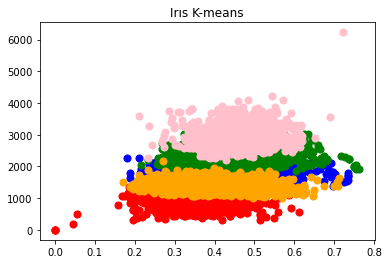

In [7]:
import matplotlib.pyplot as plt #kümeleri renkle ayırıp grafikte gösterdik
plt.scatter(features[predict==0,0], features[predict==0,1], s=50, color='red')
plt.scatter(features[predict==1,0], features[predict==1,1], s=50, color='blue')
plt.scatter(features[predict==2,0], features[predict==2,1], s=50, color='green')
plt.scatter(features[predict==3,0], features[predict==3,1], s=50, color='orange')
plt.scatter(features[predict==4,0], features[predict==4,1], s=50, color='pink')
plt.title('Irıs K-means')
plt.show()